In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [187]:
df = pd.read_csv('watson_healthcare_modified.csv')

In [188]:
df.head()

,Employee_ID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [189]:
# sns.pairplot(df)

In [190]:
ds_size = len(df)
print(ds_size)
print('% unique values in each column')
for cols in df.columns:
#     print(f'{cols} = {round(len(df[cols].unique())*100/ds_size,2)}%')
    print(f'{cols} = {len(df[cols].unique())}')

1676
% unique values in each column
Employee_ID = 1676
Age = 43
Attrition = 2
BusinessTravel = 3
DailyRate = 886
Department = 3
DistanceFromHome = 29
Education = 5
EducationField = 6
EmployeeCount = 1
EnvironmentSatisfaction = 4
Gender = 2
HourlyRate = 71
JobInvolvement = 4
JobLevel = 5
JobRole = 5
JobSatisfaction = 4
MaritalStatus = 3
MonthlyIncome = 1349
MonthlyRate = 1427
NumCompaniesWorked = 10
Over18 = 1
OverTime = 2
PercentSalaryHike = 15
PerformanceRating = 2
RelationshipSatisfaction = 4
StandardHours = 1
Shift = 4
TotalWorkingYears = 40
TrainingTimesLastYear = 7
WorkLifeBalance = 4
YearsAtCompany = 37
YearsInCurrentRole = 19
YearsSinceLastPromotion = 16
YearsWithCurrManager = 18


#### Target Variable is 'Attrition'

In [191]:
df.describe()

,Employee_ID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee_ID               1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [193]:
# df.columns

In [194]:
## Selecting only numeric based columns
df_numeric = df.select_dtypes(exclude='object').copy()
# df.select_dtypes(exclude='object').columns

In [195]:
## Selecting only object based columns
df.select_dtypes(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Rarely,Cardiology,Life Sciences,Female,Nurse,Single,Y,Yes
1,No,Travel_Frequently,Maternity,Life Sciences,Male,Other,Married,Y,No
2,Yes,Travel_Rarely,Maternity,Other,Male,Nurse,Single,Y,Yes
3,No,Travel_Frequently,Maternity,Life Sciences,Female,Other,Married,Y,Yes
4,No,Travel_Rarely,Maternity,Medical,Male,Nurse,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1671,Yes,Travel_Rarely,Neurology,Technical Degree,Male,Nurse,Single,Y,Yes
1672,No,Travel_Rarely,Cardiology,Marketing,Female,Nurse,Married,Y,Yes
1673,No,Travel_Rarely,Maternity,Life Sciences,Female,Other,Single,Y,No
1674,No,Travel_Rarely,Neurology,Life Sciences,Female,Therapist,Married,Y,No


In [196]:
for cols in df_numeric.columns:
    print(f' {cols} : \n{df_numeric[cols].value_counts()} \n')

 Employee_ID : 
1313919    1
1604086    1
1788553    1
1638427    1
1828789    1
          ..
1446447    1
1446990    1
1639147    1
1855799    1
1152329    1
Name: Employee_ID, Length: 1676, dtype: int64 

 Age : 
35    88
34    85
29    82
31    82
36    81
32    68
38    68
40    64
30    63
33    62
28    59
27    59
37    57
42    52
39    47
26    46
45    45
41    43
46    38
43    37
44    36
50    33
25    30
49    29
24    29
47    28
55    25
53    25
48    23
52    21
54    20
51    20
22    18
23    17
58    17
56    15
21    14
20    13
19    10
59    10
18     8
60     5
57     4
Name: Age, dtype: int64 

 DailyRate : 
691     7
1329    7
1082    6
444     6
530     6
       ..
1126    1
974     1
905     1
1151    1
1102    1
Name: DailyRate, Length: 886, dtype: int64 

 DistanceFromHome : 
2     241
1     239
10     99
3      96
7      95
9      93
8      89
5      76
6      72
4      69
16     38
24     34
29     33
23     33
11     33
25     29
15     29
26     28
18

In [197]:
# df.value_counts()

##### Can use 
- DistanceFromHome
- Age
- DailyRate
- HourlyRate
- MonthlyIncome (Check for outliers)
- MonthlyRate 
- PercentSalaryHike
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

In [198]:
df['Attrition'].value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

In [199]:
df['PerformanceRating'].value_counts()

3    1424
4     252
Name: PerformanceRating, dtype: int64

In [200]:
df_orig = df.copy()
box1 = px.box(df['DistanceFromHome'],width=600,height=500,points='all')
box2 = px.box(df['Age'],width=600,height=500,points='all')
box3 = px.box(df['DailyRate'],width=600,height=500,points='all')
box4 = px.box(df['HourlyRate'],width=600,height=500,points='all')
box5 = px.box(df['MonthlyIncome'],width=600,height=500,points='all') 
box6 = px.box(df['MonthlyRate'],width=600,height=500,points='all') 
box7 = px.box(df['PercentSalaryHike'],width=600,height=500,points='all') 
box8 = px.box(df['TotalWorkingYears'],width=600,height=500,points='all')
box9 = px.box(df['YearsAtCompany'],width=600,height=500,points='all')
box10 = px.box(df['YearsInCurrentRole'],width=600,height=500,points='all')
box11 = px.box(df['YearsSinceLastPromotion'],width=600,height=500,points='all')
box12 = px.box(df['YearsWithCurrManager'],width=600,height=500,points='all')

In [201]:
# box1.show()
"""
Column: DistanceFromHome
No outliers
Max: 29
Min: 1
Median: 7
Box Limit: 2 to 14
"""


'\nColumn: DistanceFromHome\nNo outliers\nMax: 29\nMin: 1\nMedian: 7\nBox Limit: 2 to 14\n'

In [202]:
# box2.show()
"""
Column: Age
Outliers: None
Max: 60
Min: 18
Median: 36 
Box Limit: 30-43
"""

'\nColumn: Age\nOutliers: None\nMax: 60\nMin: 18\nMedian: 36 \nBox Limit: 30-43\n'

In [203]:
# box3.show()
"""
Column: DailyRate
Outliers: None
Max: 1499
Min: 102
Median: 796.5
Box Limit: 465 - 1157
"""

'\nColumn: DailyRate\nOutliers: None\nMax: 1499\nMin: 102\nMedian: 796.5\nBox Limit: 465 - 1157\n'

In [204]:
# box4.show()
"""
Column: HourlyRate
Outliers: None 
Max: 100
Min: 30
Median: 65.5
Box Limit: 48 - 83
"""

'\nColumn: HourlyRate\nOutliers: None \nMax: 100\nMin: 30\nMedian: 65.5\nBox Limit: 48 - 83\n'

In [205]:
box5.show()
"""
Column: MonthlyIncome
Outliers: Yes (Above 16555 to 19.999k)
Max: 16555
Min: 1009
Median: 4899
Box Limit: 2927.5 - 8380.5
"""

'\nColumn: MonthlyIncome\nOutliers: Yes (Above 16555 to 19.999k)\nMax: 16555\nMin: 1009\nMedian: 4899\nBox Limit: 2927.5 - 8380.5\n'

In [206]:
quart1 = df['MonthlyIncome'].quantile(0.25)
quart3 = df['MonthlyIncome'].quantile(0.75)
iqr = quart3-quart1
lower_lim = quart1 - 1.5*iqr
if lower_lim<=0:
    lower_lim = min(df['MonthlyIncome'])
upper_lim = quart3 + 2*iqr
print(f'Quartile1: {quart1}\nQuartile3: {quart3}\nIQR: {iqr}\nLower Limit: {lower_lim}\nUpper Limit: {upper_lim}')
print(f"Maximum: {max(df['MonthlyIncome'])}")

Quartile1: 2928.25
Quartile3: 8380.25
IQR: 5452.0
Lower Limit: 1009
Upper Limit: 19284.25
Maximum: 19999


In [207]:
outlier_low = df['MonthlyIncome'] < lower_lim
outlier_high = df['MonthlyIncome'] > upper_lim
# outlier_high
df = df[~(outlier_low | outlier_high)].copy()


In [208]:
len(df)

1641

In [209]:
# box6.show()
"""
Column: MonthlyRate
Outliers: None
Max: 26.999k
Min: 2094
Median: 14.269k
Box Limit: 7987 - 20.462k
"""

'\nColumn: MonthlyRate\nOutliers: None\nMax: 26.999k\nMin: 2094\nMedian: 14.269k\nBox Limit: 7987 - 20.462k\n'

In [210]:
# box7.show()
"""
Column: PercentSalaryHike 
Outliers: None
Max: 25
Min: 11
Median: 14
Box Limit: 12-18 
"""

'\nColumn: PercentSalaryHike \nOutliers: None\nMax: 25\nMin: 11\nMedian: 14\nBox Limit: 12-18 \n'

In [211]:
box8.show()
"""
Column: TotalWorkingYears
Outliers: Yes
Max: 28
Min: 0
Median: 10
Box Limit: 6-15
"""

'\nColumn: TotalWorkingYears\nOutliers: Yes\nMax: 28\nMin: 0\nMedian: 10\nBox Limit: 6-15\n'

In [212]:
quart1twy = df['TotalWorkingYears'].quantile(0.25)
quart3twy = df['TotalWorkingYears'].quantile(0.75)
iqrtwy = quart3twy-quart1twy
lower_limtwy = quart1twy - 1.5*iqrtwy
if lower_limtwy<=0:
    lower_limtwy = min(df['TotalWorkingYears'])
upper_limtwy = quart3twy + 2*iqrtwy
print(f'Quartile1: {quart1twy}\nQuartile3: {quart3twy}\nIQR: {iqrtwy}\nLower Limit: {lower_limtwy}\nUpper Limit: {upper_limtwy}')
print(f"Maximum: {max(df['TotalWorkingYears'])}")

Quartile1: 6.0
Quartile3: 15.0
IQR: 9.0
Lower Limit: 0
Upper Limit: 33.0
Maximum: 40


In [213]:
outlier_lowtwy = df['TotalWorkingYears'] <= lower_limtwy
outlier_hightwy = df['TotalWorkingYears'] >= upper_limtwy
# outlier_high
df = df[~(outlier_lowtwy | outlier_hightwy)].copy()

In [214]:
len(df)#,print('removed: ',len(df[(outlier_lowtwy | outlier_hightwy)]))

1604

In [215]:
box9.show()
"""
Column: YearsAtCompany
Outliers: Yes
Max: 20
Min: 3
Median: 5
Box Limit: 3 - 10 
"""

'\nColumn: YearsAtCompany\nOutliers: Yes\nMax: 20\nMin: 3\nMedian: 5\nBox Limit: 3 - 10 \n'

In [216]:
quart1yac = df['YearsAtCompany'].quantile(0.25)
quart3yac = df['YearsAtCompany'].quantile(0.75)
iqryac = quart3yac-quart1yac
lower_limyac = quart1yac - 1.5*iqryac
if lower_limyac<=0:
    lower_limyac = min(df['YearsAtCompany'])
upper_limyac = quart3yac + 2*iqryac
print(f'Quartile1: {quart1yac}\nQuartile3: {quart3yac}\nIQR: {iqryac}\nLower Limit: {lower_limyac}\nUpper Limit: {upper_limyac}')
print(f"Maximum: {max(df['YearsAtCompany'])}")

Quartile1: 3.0
Quartile3: 9.0
IQR: 6.0
Lower Limit: 0
Upper Limit: 21.0
Maximum: 32


In [217]:
outlier_lowyac = df['YearsAtCompany'] < lower_limyac
outlier_highyac = df['YearsAtCompany'] > upper_limyac
# outlier_high
df = df[~(outlier_lowyac | outlier_highyac)].copy()


In [218]:
len(df)#,print('removed: ',len(df[(outlier_lowyac | outlier_highyac)]))

1564

In [219]:
box10.show()
"""
Column: YearsInCurrentRole
Outliers: Yes
Max: 14
Min: 2
Median: 3 
Box Limit: 2-7 
"""

'\nColumn: YearsInCurrentRole\nOutliers: Yes\nMax: 14\nMin: 2\nMedian: 3 \nBox Limit: 2-7 \n'

In [220]:
quart1yicr = df['YearsInCurrentRole'].quantile(0.25)
quart3yicr = df['YearsInCurrentRole'].quantile(0.75)
iqryicr = quart3yicr-quart1yicr
lower_limyicr = quart1yicr - 1.5*iqryicr
if lower_limyicr<=0:
    lower_limyicr = min(df['YearsInCurrentRole'])
upper_limyicr = quart3yicr + 1.7*iqryicr
print(f'Quartile1: {quart1yicr}\nQuartile3: {quart3yicr}\nIQR: {iqryicr}\nLower Limit: {lower_limyicr}\nUpper Limit: {upper_limyicr}')
print(f"Maximum: {max(df['YearsInCurrentRole'])}")

Quartile1: 2.0
Quartile3: 7.0
IQR: 5.0
Lower Limit: 0
Upper Limit: 15.5
Maximum: 17


In [221]:
outlier_lowyicr = df['YearsInCurrentRole'] < lower_limyicr
outlier_highyicr = df['YearsInCurrentRole'] > upper_limyicr
# outlier_high
df = df[~(outlier_lowyicr | outlier_highyicr)].copy()

In [222]:
len(df)#,print('removed: ',len(df[(outlier_lowyicr | outlier_highyicr)]))

1557

In [223]:
box11.show()
"""
Column: YearsSinceLastPromotion
Outliers: Yes
Max: 7
Min: 0
Median: 1
Box Limit: 0-3
"""

'\nColumn: YearsSinceLastPromotion\nOutliers: Yes\nMax: 7\nMin: 0\nMedian: 1\nBox Limit: 0-3\n'

In [224]:
quart1_yslp = df['YearsSinceLastPromotion'].quantile(0.25)
quart3_yslp = df['YearsSinceLastPromotion'].quantile(0.75)
iqr_yslp = quart3_yslp-quart1_yslp
lower_lim_yslp = quart1_yslp - 1.5*iqr_yslp
if lower_lim_yslp<=0:
    lower_lim_yslp = min(df['YearsSinceLastPromotion'])
upper_lim_yslp = quart3_yslp + 5*iqr_yslp #Making top range to 12
print(f'Quartile1: {quart1_yslp}\nQuartile3: {quart3_yslp}\nIQR: {iqr_yslp}\nLower Limit: {lower_lim_yslp}\nUpper Limit: {upper_lim_yslp}')
print(f"Maximum: {max(df['YearsSinceLastPromotion'])}")

Quartile1: 0.0
Quartile3: 2.0
IQR: 2.0
Lower Limit: 0
Upper Limit: 12.0
Maximum: 15


In [225]:
## Since there are many outliers we might giveéclassify them as a new class

In [226]:
outlier_low_yslp = df['YearsSinceLastPromotion'] < lower_lim_yslp
outlier_high_yslp = df['YearsSinceLastPromotion'] > upper_lim_yslp
# outlier_high
df = df[~(outlier_low_yslp | outlier_high_yslp)].copy()

In [227]:
len(df)#,print('removed: ',len(df[(outlier_low_yslp | outlier_high_yslp)]))

1545

.

In [228]:
box12.show()
"""
Column: YearsWithCurrManager
Outliers: Yes
Max: 14
Min: 0
Median: 3
Box Limit: 2-7 
"""

'\nColumn: YearsWithCurrManager\nOutliers: Yes\nMax: 14\nMin: 0\nMedian: 3\nBox Limit: 2-7 \n'

In [229]:
quart1 = df['YearsWithCurrManager'].quantile(0.25)
quart3 = df['YearsWithCurrManager'].quantile(0.75)
iqr = quart3-quart1
lower_lim = quart1 - 1.5*iqr
if lower_lim<=0:
    lower_lim = min(df['YearsWithCurrManager'])
upper_lim = quart3 + 1.7*iqr
print(f'Quartile1: {quart1}\nQuartile3: {quart3}\nIQR: {iqr}\nLower Limit: {lower_lim}\nUpper Limit: {upper_lim}')
print(f"Maximum: {max(df['YearsWithCurrManager'])}")

Quartile1: 2.0
Quartile3: 7.0
IQR: 5.0
Lower Limit: 0
Upper Limit: 15.5
Maximum: 17


In [230]:
outlier_low = df['YearsInCurrentRole'] < lower_lim
outlier_high = df['YearsInCurrentRole'] > upper_lim
# outlier_high
df = df[~(outlier_low | outlier_high)].copy()


In [231]:
len(df)#,print('removed: ',len(df[(outlier_low | outlier_high)]))

1545

#### Removing the outliers outside 1.5IQR +-

In [232]:
# df_upd1.head()
# df_upd2.head()
# df_upd3.head()
# df_upd4.head()
# df_upd5.head()
# df_upd6.head()

In [233]:
len(df_orig),len(df)

(1676, 1545)

In [234]:
df['Attrition'].value_counts()

No     1355
Yes     190
Name: Attrition, dtype: int64

In [235]:
## Try Over Sampling too

##### https://towardsdatascience.com/feature-handling-3f14c12ecbb8
##### https://plotly.com/python/setting-graph-size/

## PHASE 1 ##
### Without Removing the Outliers ###

## Models and TrainTestSplit



In [236]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [237]:
df_orig.dtypes

Employee_ID                  int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Lebel Encode -> ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'Marital Status', 'OverTime','Over18']

In [238]:
df_orig.select_dtypes(exclude='object').columns

Index(['Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [239]:
col_obs = ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'MaritalStatus', 'OverTime','Over18']

In [240]:
# for i in col_obs:
#     print(df[i].value_counts())
#     print('\n')

In [241]:
## Drop Over18 Column, 
# X = df[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus','OverTime']]

bus_tra_le = LabelEncoder()
dept_le = LabelEncoder()
edufld_le = LabelEncoder()
jb_role_le = LabelEncoder()
mari_le = LabelEncoder()
overtm_le = LabelEncoder()
le_targ = LabelEncoder()

In [242]:
df_copy = df_orig.copy()
df_copy['BusinessTravel'] = bus_tra_le.fit_transform(df_copy['BusinessTravel'])
df_copy['Department'] = dept_le.fit_transform(df_copy['Department'])
df_copy['EducationField'] = edufld_le.fit_transform(df_copy['EducationField'])
df_copy['JobRole'] = jb_role_le.fit_transform(df_copy['JobRole'])
df_copy['MaritalStatus'] = mari_le.fit_transform(df_copy['MaritalStatus'])
df_copy['OverTime'] = overtm_le.fit_transform(df_copy['OverTime'])

df_copy['Attrition'] = le_targ.fit_transform(df_copy['Attrition'])
# df_copy

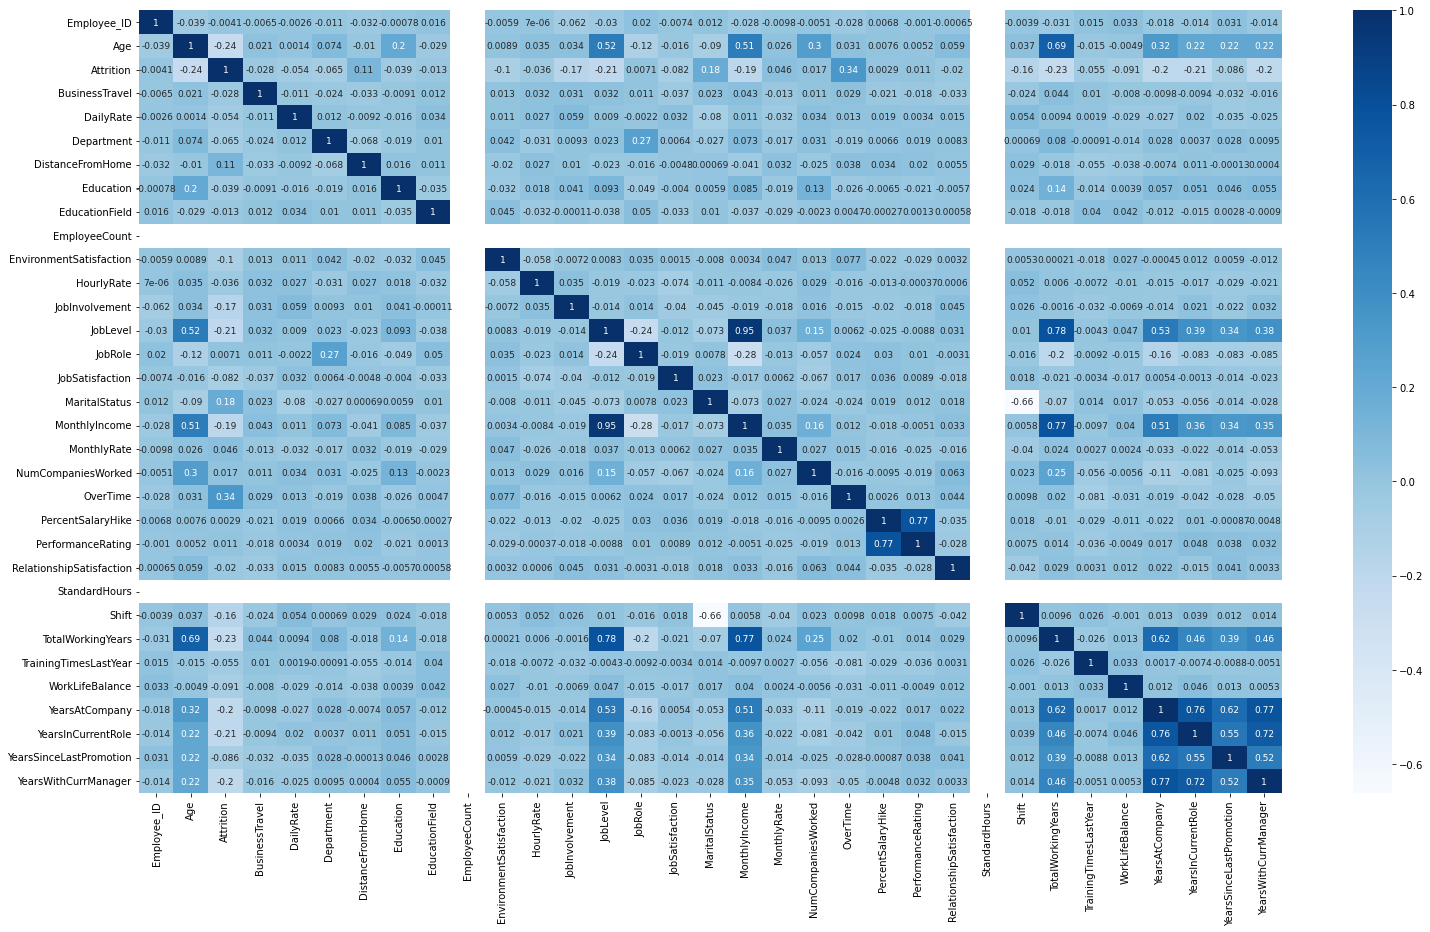

In [243]:

# corr_val_1 = df_copy.corr()
# sns.heatmap(corr_val_1,cmap='Blues',annot=True)

corr_val_1 = df_copy.corr()
fig,ax = plt.subplots(figsize=(25.6,14.4))
fig = sns.heatmap(corr_val_1,cmap='Blues',annot=True, annot_kws={"size":9})

In [244]:
y = df_copy['Attrition']

X = df_copy[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus',
        'OverTime','Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'
]]

In [245]:
# df_copy.corr()['Attrition']

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=21)

In [247]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1340, 32), (1340,), (336, 32), (336,))

### Random Forest ###

In [248]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rf_1_acc = accuracy_score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



In [249]:
rf_1_prec = precision_score(y_test, y_pred)
rf_1_rec = recall_score(y_test,y_pred)
rf_1_f1 = f1_score(y_test, y_pred)

In [250]:
rf_1_classification_report = classification_report(y_test,y_pred)
print(rf_1_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       297
           1       0.65      0.38      0.48        39

    accuracy                           0.90       336
   macro avg       0.79      0.68      0.72       336
weighted avg       0.89      0.90      0.89       336



https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [251]:
# !pip install xgboost
# !pip install catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGB- Classifier ###

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=21)

In [253]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_score_xgb

0.9166666666666666

In [254]:
xgb_1_prec = precision_score(y_test, y_pred_xgb)
xgb_1_rec = recall_score(y_test,y_pred_xgb)
xgb_1_f1 = f1_score(y_test, y_pred_xgb)

In [255]:
xgb_1_classification_report = classification_report(y_test,y_pred_xgb)
print(xgb_1_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       297
           1       0.69      0.51      0.59        39

    accuracy                           0.92       336
   macro avg       0.81      0.74      0.77       336
weighted avg       0.91      0.92      0.91       336



### CatBoost ###

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=21)

In [257]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
y_pred_catboost = catboost_model.predict(X_test)
accuracy_score_cat = accuracy_score(y_test,y_pred_catboost)
accuracy_score_cat

Learning rate set to 0.011674
0:	learn: 0.6765151	total: 6.85ms	remaining: 6.84s
1:	learn: 0.6624983	total: 11.9ms	remaining: 5.94s
2:	learn: 0.6474093	total: 15.7ms	remaining: 5.22s
3:	learn: 0.6342587	total: 19.5ms	remaining: 4.85s
4:	learn: 0.6256160	total: 25.4ms	remaining: 5.05s
5:	learn: 0.6134187	total: 29.1ms	remaining: 4.81s
6:	learn: 0.6049881	total: 32.7ms	remaining: 4.64s
7:	learn: 0.5919190	total: 37.4ms	remaining: 4.64s
8:	learn: 0.5792644	total: 41.2ms	remaining: 4.53s
9:	learn: 0.5672647	total: 44.8ms	remaining: 4.44s
10:	learn: 0.5564978	total: 48.5ms	remaining: 4.36s
11:	learn: 0.5452754	total: 52.2ms	remaining: 4.3s
12:	learn: 0.5355623	total: 55.9ms	remaining: 4.24s
13:	learn: 0.5241967	total: 59.5ms	remaining: 4.19s
14:	learn: 0.5166189	total: 63.1ms	remaining: 4.14s
15:	learn: 0.5067408	total: 67.1ms	remaining: 4.13s
16:	learn: 0.4968742	total: 70.8ms	remaining: 4.1s
17:	learn: 0.4895536	total: 74.5ms	remaining: 4.06s
18:	learn: 0.4791587	total: 78.1ms	remaining: 

170:	learn: 0.1582239	total: 810ms	remaining: 3.92s
171:	learn: 0.1577462	total: 814ms	remaining: 3.92s
172:	learn: 0.1569745	total: 820ms	remaining: 3.92s
173:	learn: 0.1566466	total: 825ms	remaining: 3.92s
174:	learn: 0.1560013	total: 832ms	remaining: 3.92s
175:	learn: 0.1551958	total: 836ms	remaining: 3.92s
176:	learn: 0.1547735	total: 840ms	remaining: 3.91s
177:	learn: 0.1546258	total: 842ms	remaining: 3.89s
178:	learn: 0.1539899	total: 846ms	remaining: 3.88s
179:	learn: 0.1535498	total: 850ms	remaining: 3.87s
180:	learn: 0.1527716	total: 854ms	remaining: 3.86s
181:	learn: 0.1523506	total: 857ms	remaining: 3.85s
182:	learn: 0.1516931	total: 861ms	remaining: 3.85s
183:	learn: 0.1510689	total: 866ms	remaining: 3.84s
184:	learn: 0.1505791	total: 869ms	remaining: 3.83s
185:	learn: 0.1502584	total: 873ms	remaining: 3.82s
186:	learn: 0.1498239	total: 877ms	remaining: 3.81s
187:	learn: 0.1494586	total: 881ms	remaining: 3.8s
188:	learn: 0.1490021	total: 884ms	remaining: 3.79s
189:	learn: 0

338:	learn: 0.0994850	total: 1.53s	remaining: 2.98s
339:	learn: 0.0992420	total: 1.53s	remaining: 2.98s
340:	learn: 0.0991187	total: 1.54s	remaining: 2.97s
341:	learn: 0.0988882	total: 1.54s	remaining: 2.97s
342:	learn: 0.0986453	total: 1.55s	remaining: 2.97s
343:	learn: 0.0983788	total: 1.55s	remaining: 2.97s
344:	learn: 0.0981865	total: 1.56s	remaining: 2.96s
345:	learn: 0.0980137	total: 1.56s	remaining: 2.95s
346:	learn: 0.0978169	total: 1.57s	remaining: 2.95s
347:	learn: 0.0976376	total: 1.57s	remaining: 2.94s
348:	learn: 0.0973832	total: 1.57s	remaining: 2.94s
349:	learn: 0.0971116	total: 1.58s	remaining: 2.93s
350:	learn: 0.0968959	total: 1.58s	remaining: 2.92s
351:	learn: 0.0966138	total: 1.58s	remaining: 2.92s
352:	learn: 0.0964835	total: 1.59s	remaining: 2.91s
353:	learn: 0.0962486	total: 1.59s	remaining: 2.91s
354:	learn: 0.0960421	total: 1.6s	remaining: 2.9s
355:	learn: 0.0958248	total: 1.6s	remaining: 2.9s
356:	learn: 0.0956561	total: 1.6s	remaining: 2.89s
357:	learn: 0.095

510:	learn: 0.0717328	total: 2.25s	remaining: 2.15s
511:	learn: 0.0716070	total: 2.25s	remaining: 2.15s
512:	learn: 0.0714551	total: 2.26s	remaining: 2.15s
513:	learn: 0.0713790	total: 2.27s	remaining: 2.14s
514:	learn: 0.0712535	total: 2.27s	remaining: 2.14s
515:	learn: 0.0711161	total: 2.28s	remaining: 2.14s
516:	learn: 0.0709881	total: 2.28s	remaining: 2.13s
517:	learn: 0.0708664	total: 2.29s	remaining: 2.13s
518:	learn: 0.0706980	total: 2.29s	remaining: 2.12s
519:	learn: 0.0705194	total: 2.29s	remaining: 2.12s
520:	learn: 0.0703872	total: 2.3s	remaining: 2.11s
521:	learn: 0.0701958	total: 2.3s	remaining: 2.11s
522:	learn: 0.0700686	total: 2.3s	remaining: 2.1s
523:	learn: 0.0700163	total: 2.31s	remaining: 2.1s
524:	learn: 0.0698955	total: 2.31s	remaining: 2.09s
525:	learn: 0.0697656	total: 2.32s	remaining: 2.09s
526:	learn: 0.0697211	total: 2.32s	remaining: 2.08s
527:	learn: 0.0695849	total: 2.32s	remaining: 2.08s
528:	learn: 0.0694749	total: 2.33s	remaining: 2.07s
529:	learn: 0.069

680:	learn: 0.0548898	total: 2.97s	remaining: 1.39s
681:	learn: 0.0547832	total: 2.97s	remaining: 1.39s
682:	learn: 0.0547255	total: 2.98s	remaining: 1.38s
683:	learn: 0.0546676	total: 2.98s	remaining: 1.38s
684:	learn: 0.0545511	total: 2.99s	remaining: 1.37s
685:	learn: 0.0545417	total: 2.99s	remaining: 1.37s
686:	learn: 0.0544705	total: 3s	remaining: 1.36s
687:	learn: 0.0543243	total: 3s	remaining: 1.36s
688:	learn: 0.0542469	total: 3s	remaining: 1.35s
689:	learn: 0.0541906	total: 3.01s	remaining: 1.35s
690:	learn: 0.0541214	total: 3.01s	remaining: 1.35s
691:	learn: 0.0539938	total: 3.02s	remaining: 1.34s
692:	learn: 0.0539073	total: 3.02s	remaining: 1.34s
693:	learn: 0.0538506	total: 3.02s	remaining: 1.33s
694:	learn: 0.0536680	total: 3.03s	remaining: 1.33s
695:	learn: 0.0535453	total: 3.03s	remaining: 1.32s
696:	learn: 0.0534895	total: 3.04s	remaining: 1.32s
697:	learn: 0.0534008	total: 3.04s	remaining: 1.31s
698:	learn: 0.0533369	total: 3.04s	remaining: 1.31s
699:	learn: 0.0532488

852:	learn: 0.0438378	total: 3.69s	remaining: 636ms
853:	learn: 0.0437752	total: 3.69s	remaining: 631ms
854:	learn: 0.0437057	total: 3.7s	remaining: 627ms
855:	learn: 0.0436077	total: 3.7s	remaining: 623ms
856:	learn: 0.0435579	total: 3.71s	remaining: 619ms
857:	learn: 0.0434808	total: 3.71s	remaining: 615ms
858:	learn: 0.0434664	total: 3.72s	remaining: 610ms
859:	learn: 0.0434123	total: 3.72s	remaining: 606ms
860:	learn: 0.0433489	total: 3.73s	remaining: 601ms
861:	learn: 0.0433150	total: 3.73s	remaining: 597ms
862:	learn: 0.0432603	total: 3.73s	remaining: 593ms
863:	learn: 0.0431869	total: 3.74s	remaining: 588ms
864:	learn: 0.0430852	total: 3.74s	remaining: 584ms
865:	learn: 0.0430086	total: 3.74s	remaining: 579ms
866:	learn: 0.0429684	total: 3.75s	remaining: 575ms
867:	learn: 0.0429290	total: 3.75s	remaining: 570ms
868:	learn: 0.0428741	total: 3.75s	remaining: 566ms
869:	learn: 0.0427990	total: 3.76s	remaining: 562ms
870:	learn: 0.0427656	total: 3.76s	remaining: 557ms
871:	learn: 0.

0.9136904761904762

In [258]:
accuracy_score_cat

0.9136904761904762

In [259]:
cat_1_prec = precision_score(y_test, y_pred_catboost)
cat_1_rec = recall_score(y_test,y_pred_catboost)
cat_1_f1 = f1_score(y_test, y_pred_catboost)

In [260]:
cat_1_classification_report = classification_report(y_test,y_pred_catboost)
print(cat_1_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.69      0.46      0.55        39

    accuracy                           0.91       336
   macro avg       0.81      0.72      0.75       336
weighted avg       0.90      0.91      0.91       336



## PHASE 2 ##
### Removing/Dealing with Outliers
- To deal with outliers I will first remove all to try improve the results
- Second approach will be to replace the values by the mean value or a new value (categorical kind)


## Models and TrainTestSplit



In [261]:
df_orig.dtypes

Employee_ID                  int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Lebel Encode -> ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'Marital Status', 'OverTime','Over18']

In [262]:
df.select_dtypes(exclude='object').columns

Index(['Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [263]:
col_obs = ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'MaritalStatus', 'OverTime','Over18']

In [264]:
# for i in col_obs:
#     print(df[i].value_counts())
#     print('\n')

In [265]:
## Drop Over18 Column, 
# X = df[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus','OverTime']]

bus_tra_le = LabelEncoder()
dept_le = LabelEncoder()
edufld_le = LabelEncoder()
jb_role_le = LabelEncoder()
mari_le = LabelEncoder()
overtm_le = LabelEncoder()
le_targ = LabelEncoder()

In [266]:
df_copy = df.copy()
df_copy['BusinessTravel'] = bus_tra_le.fit_transform(df_copy['BusinessTravel'])
df_copy['Department'] = dept_le.fit_transform(df_copy['Department'])
df_copy['EducationField'] = edufld_le.fit_transform(df_copy['EducationField'])
df_copy['JobRole'] = jb_role_le.fit_transform(df_copy['JobRole'])
df_copy['MaritalStatus'] = mari_le.fit_transform(df_copy['MaritalStatus'])
df_copy['OverTime'] = overtm_le.fit_transform(df_copy['OverTime'])

df_copy['Attrition'] = le_targ.fit_transform(df_copy['Attrition'])
# df_copy

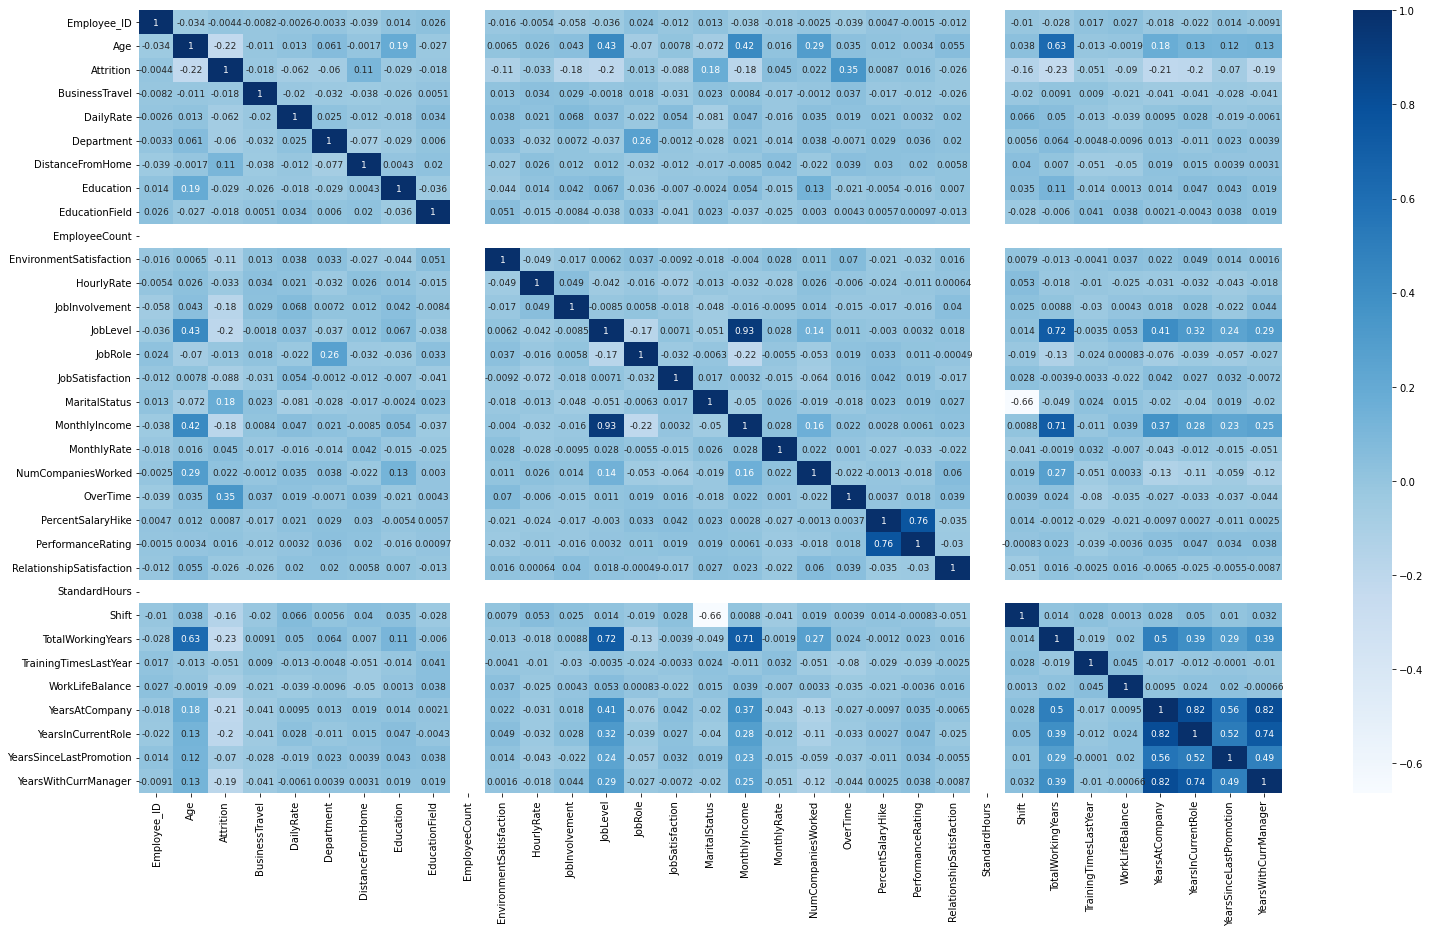

In [267]:
corr_val_1 = df_copy.corr()
fig,ax = plt.subplots(figsize=(25.6,14.4))
fig = sns.heatmap(corr_val_1,cmap='Blues',annot=True, annot_kws={"size":9})

In [268]:
y = df_copy['Attrition']

X = df_copy[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus',
        'OverTime','Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'
]]

In [269]:
# df_copy.corr()['Attrition']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [271]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1236, 32), (1236,), (309, 32), (309,))

### Random Forest ###

In [272]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=42)
clf.fit(X_train, y_train)
y_pred_rf_2 = clf.predict(X_test)
accuracy_score(y_test, y_pred_rf_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



0.9158576051779935

In [273]:
rf_2_acc = accuracy_score(y_test, y_pred_rf_2)
rf_2_prec = precision_score(y_test, y_pred_rf_2)
rf_2_rec = recall_score(y_test, y_pred_rf_2)
rf_2_f1 = f1_score(y_test, y_pred_rf_2)
rf_2_class_rep = classification_report(y_test, y_pred_rf_2)

https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [274]:
# !pip install xgboost
# !pip install catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGB- Classifier ###

In [275]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [276]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_score_xgb

0.9385113268608414

In [277]:
xgb_2_acc = accuracy_score(y_test, y_pred_xgb)
xgb_2_prec = precision_score(y_test,y_pred_xgb)
xgb_2_rec = recall_score(y_test, y_pred_xgb)
xgb_2_f1 = f1_score(y_test, y_pred_xgb)
xgb_2_class_rep = classification_report(y_test, y_pred_xgb)

### CatBoost ###

In [278]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [279]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
y_pred_catboost = catboost_model.predict(X_test)
accuracy_score_cat = accuracy_score(y_test,y_pred_catboost)
accuracy_score_cat

Learning rate set to 0.011278
0:	learn: 0.6766656	total: 6.9ms	remaining: 6.89s
1:	learn: 0.6638607	total: 10.6ms	remaining: 5.29s
2:	learn: 0.6508674	total: 15.4ms	remaining: 5.12s
3:	learn: 0.6385995	total: 19.1ms	remaining: 4.75s
4:	learn: 0.6307463	total: 22.6ms	remaining: 4.5s
5:	learn: 0.6198307	total: 26.2ms	remaining: 4.34s
6:	learn: 0.6119929	total: 29.8ms	remaining: 4.23s
7:	learn: 0.6002326	total: 33.6ms	remaining: 4.17s
8:	learn: 0.5882603	total: 37.2ms	remaining: 4.09s
9:	learn: 0.5776142	total: 41.1ms	remaining: 4.06s
10:	learn: 0.5672647	total: 44.6ms	remaining: 4.01s
11:	learn: 0.5578902	total: 48.1ms	remaining: 3.96s
12:	learn: 0.5468763	total: 51.7ms	remaining: 3.93s
13:	learn: 0.5369712	total: 55.3ms	remaining: 3.9s
14:	learn: 0.5296527	total: 58.9ms	remaining: 3.87s
15:	learn: 0.5228158	total: 62.6ms	remaining: 3.85s
16:	learn: 0.5140814	total: 66.2ms	remaining: 3.83s
17:	learn: 0.5054541	total: 69.8ms	remaining: 3.81s
18:	learn: 0.4968425	total: 73.8ms	remaining: 3

174:	learn: 0.1651001	total: 731ms	remaining: 3.44s
175:	learn: 0.1645938	total: 736ms	remaining: 3.45s
176:	learn: 0.1640750	total: 742ms	remaining: 3.45s
177:	learn: 0.1633107	total: 748ms	remaining: 3.45s
178:	learn: 0.1630022	total: 753ms	remaining: 3.46s
179:	learn: 0.1623831	total: 758ms	remaining: 3.45s
180:	learn: 0.1618576	total: 762ms	remaining: 3.45s
181:	learn: 0.1613179	total: 765ms	remaining: 3.44s
182:	learn: 0.1607698	total: 769ms	remaining: 3.43s
183:	learn: 0.1603991	total: 773ms	remaining: 3.43s
184:	learn: 0.1600588	total: 776ms	remaining: 3.42s
185:	learn: 0.1592788	total: 780ms	remaining: 3.41s
186:	learn: 0.1588226	total: 783ms	remaining: 3.41s
187:	learn: 0.1584281	total: 787ms	remaining: 3.4s
188:	learn: 0.1579550	total: 791ms	remaining: 3.39s
189:	learn: 0.1573739	total: 794ms	remaining: 3.38s
190:	learn: 0.1567125	total: 798ms	remaining: 3.38s
191:	learn: 0.1559846	total: 802ms	remaining: 3.37s
192:	learn: 0.1554079	total: 805ms	remaining: 3.37s
193:	learn: 0

373:	learn: 0.0984045	total: 1.5s	remaining: 2.52s
374:	learn: 0.0981747	total: 1.51s	remaining: 2.52s
375:	learn: 0.0979142	total: 1.52s	remaining: 2.52s
376:	learn: 0.0977632	total: 1.52s	remaining: 2.52s
377:	learn: 0.0975917	total: 1.53s	remaining: 2.51s
378:	learn: 0.0973869	total: 1.53s	remaining: 2.51s
379:	learn: 0.0972106	total: 1.53s	remaining: 2.5s
380:	learn: 0.0969371	total: 1.54s	remaining: 2.5s
381:	learn: 0.0967924	total: 1.54s	remaining: 2.5s
382:	learn: 0.0966365	total: 1.55s	remaining: 2.49s
383:	learn: 0.0964057	total: 1.55s	remaining: 2.49s
384:	learn: 0.0962015	total: 1.55s	remaining: 2.48s
385:	learn: 0.0959615	total: 1.56s	remaining: 2.48s
386:	learn: 0.0957516	total: 1.56s	remaining: 2.47s
387:	learn: 0.0954767	total: 1.56s	remaining: 2.47s
388:	learn: 0.0953266	total: 1.57s	remaining: 2.46s
389:	learn: 0.0951136	total: 1.57s	remaining: 2.46s
390:	learn: 0.0949105	total: 1.58s	remaining: 2.46s
391:	learn: 0.0947619	total: 1.58s	remaining: 2.45s
392:	learn: 0.09

567:	learn: 0.0670893	total: 2.26s	remaining: 1.72s
568:	learn: 0.0669536	total: 2.26s	remaining: 1.71s
569:	learn: 0.0667387	total: 2.27s	remaining: 1.71s
570:	learn: 0.0665528	total: 2.27s	remaining: 1.71s
571:	learn: 0.0664226	total: 2.28s	remaining: 1.71s
572:	learn: 0.0663538	total: 2.28s	remaining: 1.7s
573:	learn: 0.0662422	total: 2.29s	remaining: 1.7s
574:	learn: 0.0661539	total: 2.29s	remaining: 1.69s
575:	learn: 0.0660055	total: 2.29s	remaining: 1.69s
576:	learn: 0.0658378	total: 2.3s	remaining: 1.68s
577:	learn: 0.0657485	total: 2.3s	remaining: 1.68s
578:	learn: 0.0656620	total: 2.3s	remaining: 1.68s
579:	learn: 0.0654941	total: 2.31s	remaining: 1.67s
580:	learn: 0.0654260	total: 2.31s	remaining: 1.67s
581:	learn: 0.0653072	total: 2.31s	remaining: 1.66s
582:	learn: 0.0652474	total: 2.32s	remaining: 1.66s
583:	learn: 0.0651036	total: 2.32s	remaining: 1.65s
584:	learn: 0.0649226	total: 2.33s	remaining: 1.65s
585:	learn: 0.0648044	total: 2.33s	remaining: 1.65s
586:	learn: 0.064

766:	learn: 0.0475902	total: 3.02s	remaining: 917ms
767:	learn: 0.0475096	total: 3.02s	remaining: 914ms
768:	learn: 0.0474107	total: 3.03s	remaining: 910ms
769:	learn: 0.0473250	total: 3.04s	remaining: 907ms
770:	learn: 0.0472500	total: 3.04s	remaining: 903ms
771:	learn: 0.0471630	total: 3.04s	remaining: 899ms
772:	learn: 0.0470708	total: 3.05s	remaining: 895ms
773:	learn: 0.0469814	total: 3.05s	remaining: 891ms
774:	learn: 0.0468906	total: 3.06s	remaining: 887ms
775:	learn: 0.0468124	total: 3.06s	remaining: 883ms
776:	learn: 0.0467585	total: 3.06s	remaining: 879ms
777:	learn: 0.0466941	total: 3.07s	remaining: 875ms
778:	learn: 0.0465961	total: 3.07s	remaining: 871ms
779:	learn: 0.0465174	total: 3.07s	remaining: 867ms
780:	learn: 0.0464811	total: 3.08s	remaining: 863ms
781:	learn: 0.0464102	total: 3.08s	remaining: 859ms
782:	learn: 0.0463365	total: 3.08s	remaining: 855ms
783:	learn: 0.0462743	total: 3.09s	remaining: 851ms
784:	learn: 0.0462113	total: 3.09s	remaining: 847ms
785:	learn: 

962:	learn: 0.0366110	total: 3.76s	remaining: 145ms
963:	learn: 0.0365643	total: 3.77s	remaining: 141ms
964:	learn: 0.0365178	total: 3.77s	remaining: 137ms
965:	learn: 0.0364675	total: 3.78s	remaining: 133ms
966:	learn: 0.0364183	total: 3.79s	remaining: 129ms
967:	learn: 0.0363682	total: 3.79s	remaining: 125ms
968:	learn: 0.0362816	total: 3.79s	remaining: 121ms
969:	learn: 0.0362502	total: 3.8s	remaining: 117ms
970:	learn: 0.0362225	total: 3.8s	remaining: 114ms
971:	learn: 0.0361603	total: 3.8s	remaining: 110ms
972:	learn: 0.0361099	total: 3.81s	remaining: 106ms
973:	learn: 0.0360238	total: 3.81s	remaining: 102ms
974:	learn: 0.0359764	total: 3.82s	remaining: 97.9ms
975:	learn: 0.0359463	total: 3.82s	remaining: 93.9ms
976:	learn: 0.0358822	total: 3.82s	remaining: 90ms
977:	learn: 0.0358049	total: 3.83s	remaining: 86.1ms
978:	learn: 0.0357577	total: 3.83s	remaining: 82.2ms
979:	learn: 0.0356992	total: 3.83s	remaining: 78.3ms
980:	learn: 0.0356161	total: 3.84s	remaining: 74.3ms
981:	learn

0.9385113268608414

In [280]:
accuracy_score_cat

0.9385113268608414

In [281]:
catb_2_acc = accuracy_score(y_test, y_pred_catboost)
catb_2_prec = precision_score(y_test,y_pred_catboost)
catb_2_rec = recall_score(y_test, y_pred_catboost)
catb_2_f1 = f1_score(y_test, y_pred_catboost)
catb_2_class_rep = classification_report(y_test, y_pred_catboost)

## PHASE 3
### Using only Select Columns for the model training


## Models and TrainTestSplit



In [282]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [283]:
df_orig.dtypes

Employee_ID                  int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Lebel Encode -> ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'Marital Status', 'OverTime','Over18']

In [284]:
df.select_dtypes(exclude='object').columns

Index(['Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [285]:
col_obs = ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'MaritalStatus', 'OverTime','Over18']

In [286]:
# for i in col_obs:
#     print(df[i].value_counts())
#     print('\n')

In [287]:
## Drop Over18 Column, 
# X = df[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus','OverTime']]

bus_tra_le = LabelEncoder()
dept_le = LabelEncoder()
edufld_le = LabelEncoder()
jb_role_le = LabelEncoder()
mari_le = LabelEncoder()
overtm_le = LabelEncoder()
le_targ = LabelEncoder()

In [288]:
df_copy = df.copy()
df_copy['BusinessTravel'] = bus_tra_le.fit_transform(df_copy['BusinessTravel'])
df_copy['Department'] = dept_le.fit_transform(df_copy['Department'])
df_copy['EducationField'] = edufld_le.fit_transform(df_copy['EducationField'])
df_copy['JobRole'] = jb_role_le.fit_transform(df_copy['JobRole'])
df_copy['MaritalStatus'] = mari_le.fit_transform(df_copy['MaritalStatus'])
df_copy['OverTime'] = overtm_le.fit_transform(df_copy['OverTime'])

df_copy['Attrition'] = le_targ.fit_transform(df_copy['Attrition'])
# df_copy

In [289]:
# corr_val_1 = df_copy.corr()
# fig,ax = plt.subplots(figsize=(25.6,14.4))
# fig = sns.heatmap(corr_val_1,cmap='Blues',annot=True, annot_kws={"size":9})
cols_sel = abs(df_copy.corr()['Attrition'])>=0.1

In [290]:
cols_sel
# Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,OverTime, Shift, TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager

Employee_ID                 False
Age                          True
Attrition                    True
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome             True
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction      True
HourlyRate                  False
JobInvolvement               True
JobLevel                     True
JobRole                     False
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
Shift                        True
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [291]:
y = df_copy['Attrition']

X = df_copy[['Age','DistanceFromHome','EnvironmentSatisfaction',
             'JobInvolvement','JobLevel','MaritalStatus','MonthlyIncome','OverTime',
             'Shift', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager'
]]

In [292]:
# df_copy.corr()['Attrition']

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [294]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1236, 13), (1236,), (309, 13), (309,))

### Random Forest ###

In [295]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred_rf_3 = clf.predict(X_test)
accuracy_score(y_test, y_pred_rf_3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



0.9320388349514563

In [296]:
rf_3_acc = accuracy_score(y_test, y_pred_rf_3)
rf_3_prec = precision_score(y_test, y_pred_rf_3)
rf_3_rec = recall_score(y_test, y_pred_rf_3)
rf_3_f1 = f1_score(y_test, y_pred_rf_3)
rf_3_class_rep = classification_report(y_test, y_pred_rf_3)

https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [297]:
# !pip install xgboost
# !pip install catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGB- Classifier ###

In [298]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [299]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb_3 = xgb_model.predict(X_test)

In [300]:
xgb_3_acc = accuracy_score(y_test, y_pred_xgb_3)
xgb_3_prec = precision_score(y_test,y_pred_xgb_3)
xgb_3_rec = recall_score(y_test, y_pred_xgb_3)
xgb_3_f1 = f1_score(y_test, y_pred_xgb_3)
xgb_3_class_rep = classification_report(y_test, y_pred_xgb_3)

### CatBoost ###

In [301]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [302]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
y_pred_catboost_3 = catboost_model.predict(X_test)

Learning rate set to 0.011278
0:	learn: 0.6777035	total: 4.22ms	remaining: 4.22s
1:	learn: 0.6625957	total: 7.49ms	remaining: 3.74s
2:	learn: 0.6461067	total: 10.7ms	remaining: 3.57s
3:	learn: 0.6313359	total: 13.9ms	remaining: 3.46s
4:	learn: 0.6195514	total: 16.1ms	remaining: 3.21s
5:	learn: 0.6060228	total: 18.7ms	remaining: 3.1s
6:	learn: 0.5925105	total: 21ms	remaining: 2.98s
7:	learn: 0.5806067	total: 23.2ms	remaining: 2.88s
8:	learn: 0.5722915	total: 25.4ms	remaining: 2.8s
9:	learn: 0.5615823	total: 27.6ms	remaining: 2.74s
10:	learn: 0.5503918	total: 30.5ms	remaining: 2.75s
11:	learn: 0.5409066	total: 32.8ms	remaining: 2.7s
12:	learn: 0.5302099	total: 35ms	remaining: 2.65s
13:	learn: 0.5219366	total: 36.8ms	remaining: 2.59s
14:	learn: 0.5113885	total: 39.1ms	remaining: 2.56s
15:	learn: 0.5021906	total: 41.3ms	remaining: 2.54s
16:	learn: 0.4962151	total: 42.7ms	remaining: 2.47s
17:	learn: 0.4873258	total: 44.9ms	remaining: 2.45s
18:	learn: 0.4789077	total: 48ms	remaining: 2.48s
1

216:	learn: 0.1546398	total: 528ms	remaining: 1.91s
217:	learn: 0.1542040	total: 532ms	remaining: 1.91s
218:	learn: 0.1539708	total: 535ms	remaining: 1.91s
219:	learn: 0.1537487	total: 538ms	remaining: 1.91s
220:	learn: 0.1533626	total: 541ms	remaining: 1.91s
221:	learn: 0.1531323	total: 544ms	remaining: 1.91s
222:	learn: 0.1528748	total: 547ms	remaining: 1.91s
223:	learn: 0.1526767	total: 550ms	remaining: 1.91s
224:	learn: 0.1524461	total: 553ms	remaining: 1.91s
225:	learn: 0.1522511	total: 556ms	remaining: 1.9s
226:	learn: 0.1518570	total: 558ms	remaining: 1.9s
227:	learn: 0.1513900	total: 560ms	remaining: 1.9s
228:	learn: 0.1509947	total: 562ms	remaining: 1.89s
229:	learn: 0.1506904	total: 565ms	remaining: 1.89s
230:	learn: 0.1504904	total: 567ms	remaining: 1.89s
231:	learn: 0.1501592	total: 570ms	remaining: 1.89s
232:	learn: 0.1498614	total: 573ms	remaining: 1.89s
233:	learn: 0.1494469	total: 575ms	remaining: 1.88s
234:	learn: 0.1490326	total: 577ms	remaining: 1.88s
235:	learn: 0.1

431:	learn: 0.1098506	total: 1.04s	remaining: 1.37s
432:	learn: 0.1096982	total: 1.05s	remaining: 1.37s
433:	learn: 0.1096063	total: 1.05s	remaining: 1.37s
434:	learn: 0.1094214	total: 1.05s	remaining: 1.37s
435:	learn: 0.1093309	total: 1.06s	remaining: 1.37s
436:	learn: 0.1091765	total: 1.06s	remaining: 1.36s
437:	learn: 0.1089747	total: 1.06s	remaining: 1.36s
438:	learn: 0.1088653	total: 1.06s	remaining: 1.36s
439:	learn: 0.1086514	total: 1.07s	remaining: 1.36s
440:	learn: 0.1086091	total: 1.07s	remaining: 1.35s
441:	learn: 0.1084975	total: 1.07s	remaining: 1.35s
442:	learn: 0.1083166	total: 1.07s	remaining: 1.35s
443:	learn: 0.1081866	total: 1.08s	remaining: 1.35s
444:	learn: 0.1080967	total: 1.08s	remaining: 1.34s
445:	learn: 0.1079564	total: 1.08s	remaining: 1.34s
446:	learn: 0.1078248	total: 1.08s	remaining: 1.34s
447:	learn: 0.1077123	total: 1.08s	remaining: 1.34s
448:	learn: 0.1075484	total: 1.09s	remaining: 1.33s
449:	learn: 0.1073912	total: 1.09s	remaining: 1.33s
450:	learn: 

657:	learn: 0.0848175	total: 1.57s	remaining: 817ms
658:	learn: 0.0847826	total: 1.57s	remaining: 815ms
659:	learn: 0.0846326	total: 1.58s	remaining: 813ms
660:	learn: 0.0845320	total: 1.58s	remaining: 811ms
661:	learn: 0.0844310	total: 1.58s	remaining: 809ms
662:	learn: 0.0842870	total: 1.59s	remaining: 807ms
663:	learn: 0.0841263	total: 1.59s	remaining: 805ms
664:	learn: 0.0840551	total: 1.59s	remaining: 802ms
665:	learn: 0.0839859	total: 1.59s	remaining: 800ms
666:	learn: 0.0838558	total: 1.6s	remaining: 798ms
667:	learn: 0.0837595	total: 1.6s	remaining: 795ms
668:	learn: 0.0836959	total: 1.6s	remaining: 793ms
669:	learn: 0.0836367	total: 1.6s	remaining: 791ms
670:	learn: 0.0835428	total: 1.61s	remaining: 788ms
671:	learn: 0.0834664	total: 1.61s	remaining: 786ms
672:	learn: 0.0834254	total: 1.61s	remaining: 783ms
673:	learn: 0.0833168	total: 1.61s	remaining: 781ms
674:	learn: 0.0831608	total: 1.62s	remaining: 778ms
675:	learn: 0.0830653	total: 1.62s	remaining: 776ms
676:	learn: 0.08

880:	learn: 0.0681874	total: 2.1s	remaining: 284ms
881:	learn: 0.0680833	total: 2.11s	remaining: 282ms
882:	learn: 0.0680309	total: 2.11s	remaining: 280ms
883:	learn: 0.0680074	total: 2.11s	remaining: 277ms
884:	learn: 0.0679812	total: 2.12s	remaining: 275ms
885:	learn: 0.0679356	total: 2.12s	remaining: 273ms
886:	learn: 0.0678858	total: 2.12s	remaining: 270ms
887:	learn: 0.0678369	total: 2.13s	remaining: 268ms
888:	learn: 0.0677761	total: 2.13s	remaining: 266ms
889:	learn: 0.0676883	total: 2.13s	remaining: 263ms
890:	learn: 0.0676246	total: 2.13s	remaining: 261ms
891:	learn: 0.0676002	total: 2.13s	remaining: 259ms
892:	learn: 0.0675271	total: 2.14s	remaining: 256ms
893:	learn: 0.0674823	total: 2.14s	remaining: 254ms
894:	learn: 0.0674580	total: 2.14s	remaining: 251ms
895:	learn: 0.0674344	total: 2.14s	remaining: 249ms
896:	learn: 0.0673637	total: 2.15s	remaining: 247ms
897:	learn: 0.0673140	total: 2.15s	remaining: 244ms
898:	learn: 0.0672716	total: 2.15s	remaining: 242ms
899:	learn: 0

In [303]:
catb_3_acc = accuracy_score(y_test, y_pred_catboost_3)
catb_3_prec = precision_score(y_test,y_pred_catboost_3)
catb_3_rec = recall_score(y_test, y_pred_catboost_3)
catb_3_f1 = f1_score(y_test, y_pred_catboost_3)
catb_3_class_rep = classification_report(y_test, y_pred_catboost_3)



## PHASE 4
### Oversampling the data entries



In [304]:
df_orig.dtypes

Employee_ID                  int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

Lebel Encode -> ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'Marital Status', 'OverTime','Over18']

In [305]:
df.select_dtypes(exclude='object').columns

Index(['Employee_ID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [306]:
col_obs = ['BusinessTravel', 'Department', 'EducationField','Department','JobRole', 'MaritalStatus', 'OverTime','Over18']

In [307]:
# for i in col_obs:
#     print(df[i].value_counts())
#     print('\n')

In [308]:
## Drop Over18 Column, 
# X = df[['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus','OverTime']]

bus_tra_le = LabelEncoder()
dept_le = LabelEncoder()
edufld_le = LabelEncoder()
jb_role_le = LabelEncoder()
mari_le = LabelEncoder()
overtm_le = LabelEncoder()
le_targ = LabelEncoder()

In [309]:
df_copy = df.copy()
df_copy['BusinessTravel'] = bus_tra_le.fit_transform(df_copy['BusinessTravel'])
df_copy['Department'] = dept_le.fit_transform(df_copy['Department'])
df_copy['EducationField'] = edufld_le.fit_transform(df_copy['EducationField'])
df_copy['JobRole'] = jb_role_le.fit_transform(df_copy['JobRole'])
df_copy['MaritalStatus'] = mari_le.fit_transform(df_copy['MaritalStatus'])
df_copy['OverTime'] = overtm_le.fit_transform(df_copy['OverTime'])

df_copy['Attrition'] = le_targ.fit_transform(df_copy['Attrition'])
# df_copy

In [310]:
# corr_val_1 = df_copy.corr()
# fig,ax = plt.subplots(figsize=(25.6,14.4))
# fig = sns.heatmap(corr_val_1,cmap='Blues',annot=True, annot_kws={"size":9})
cols_sel = abs(df_copy.corr()['Attrition'])>=0.1

In [311]:
cols_sel
# Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,MaritalStatus,MonthlyIncome,OverTime, Shift, TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager

Employee_ID                 False
Age                          True
Attrition                    True
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome             True
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction      True
HourlyRate                  False
JobInvolvement               True
JobLevel                     True
JobRole                     False
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
Shift                        True
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [312]:
y = df_copy['Attrition']

X = df_copy[['Age','DistanceFromHome','EnvironmentSatisfaction',
             'JobInvolvement','JobLevel','MaritalStatus','MonthlyIncome','OverTime',
             'Shift', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager'
]]

In [313]:
# df_copy.corr()['Attrition']

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [315]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1236, 13), (1236,), (309, 13), (309,))

### Oversampling using SMOTE only the training dataset

In [316]:
# !conda install -c conda-forge imbalanced-learn

In [317]:
import sklearn
sklearn.__version__

'1.1.3'

In [318]:
## Oversample the Minoirity class
# !pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE
oversamp = SMOTE()

In [319]:
X_train, y_train = oversamp.fit_resample(X_train, y_train)

In [320]:
X_train.shape,y_train.shape

((2154, 13), (2154,))

In [321]:
y_train.value_counts()

0    1077
1    1077
Name: Attrition, dtype: int64

### Random Forest ###

In [322]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred_rf_4 = clf.predict(X_test)
accuracy_score(y_test, y_pred_rf_4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



0.8964401294498382

In [323]:
rf_4_acc = accuracy_score(y_test, y_pred_rf_4)
rf_4_prec = precision_score(y_test, y_pred_rf_4)
rf_4_rec = recall_score(y_test, y_pred_rf_4)
rf_4_f1 = f1_score(y_test, y_pred_rf_4)
rf_4_class_rep = classification_report(y_test, y_pred_rf_4)

https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [324]:
# !pip install xgboost
# !pip install catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### XGB- Classifier ###

In [325]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [326]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb_4 = xgb_model.predict(X_test)

In [327]:
xgb_4_acc = accuracy_score(y_test, y_pred_xgb_4)
xgb_4_prec = precision_score(y_test,y_pred_xgb_4)
xgb_4_rec = recall_score(y_test, y_pred_xgb_4)
xgb_4_f1 = f1_score(y_test, y_pred_xgb_4)
xgb_4_class_rep = classification_report(y_test, y_pred_xgb_4)

### CatBoost ###

In [328]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [329]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
y_pred_catboost_4 = catboost_model.predict(X_test)

Learning rate set to 0.014297
0:	learn: 0.6799306	total: 14.8ms	remaining: 14.8s
1:	learn: 0.6655400	total: 18.5ms	remaining: 9.25s
2:	learn: 0.6520199	total: 22.2ms	remaining: 7.39s
3:	learn: 0.6372572	total: 28ms	remaining: 6.96s
4:	learn: 0.6249026	total: 31.6ms	remaining: 6.3s
5:	learn: 0.6137026	total: 35.5ms	remaining: 5.87s
6:	learn: 0.6027599	total: 39.3ms	remaining: 5.58s
7:	learn: 0.5919253	total: 43ms	remaining: 5.33s
8:	learn: 0.5830778	total: 46.1ms	remaining: 5.07s
9:	learn: 0.5730415	total: 49.3ms	remaining: 4.88s
10:	learn: 0.5630128	total: 52.7ms	remaining: 4.74s
11:	learn: 0.5541894	total: 56.1ms	remaining: 4.62s
12:	learn: 0.5455517	total: 58.8ms	remaining: 4.46s
13:	learn: 0.5355630	total: 61.4ms	remaining: 4.33s
14:	learn: 0.5280339	total: 64.3ms	remaining: 4.22s
15:	learn: 0.5223202	total: 66.9ms	remaining: 4.11s
16:	learn: 0.5139275	total: 69.5ms	remaining: 4.02s
17:	learn: 0.5055183	total: 72.1ms	remaining: 3.93s
18:	learn: 0.4979242	total: 74.6ms	remaining: 3.8

210:	learn: 0.2039549	total: 739ms	remaining: 2.76s
211:	learn: 0.2036656	total: 742ms	remaining: 2.76s
212:	learn: 0.2031417	total: 746ms	remaining: 2.75s
213:	learn: 0.2026973	total: 749ms	remaining: 2.75s
214:	learn: 0.2023981	total: 752ms	remaining: 2.75s
215:	learn: 0.2021368	total: 756ms	remaining: 2.74s
216:	learn: 0.2016440	total: 759ms	remaining: 2.74s
217:	learn: 0.2010984	total: 763ms	remaining: 2.74s
218:	learn: 0.2007230	total: 765ms	remaining: 2.73s
219:	learn: 0.2002825	total: 768ms	remaining: 2.72s
220:	learn: 0.1999772	total: 771ms	remaining: 2.71s
221:	learn: 0.1995240	total: 773ms	remaining: 2.71s
222:	learn: 0.1989772	total: 776ms	remaining: 2.7s
223:	learn: 0.1986856	total: 778ms	remaining: 2.69s
224:	learn: 0.1983175	total: 781ms	remaining: 2.69s
225:	learn: 0.1980758	total: 783ms	remaining: 2.68s
226:	learn: 0.1977434	total: 786ms	remaining: 2.67s
227:	learn: 0.1972240	total: 788ms	remaining: 2.67s
228:	learn: 0.1968826	total: 791ms	remaining: 2.66s
229:	learn: 0

434:	learn: 0.1457389	total: 1.42s	remaining: 1.85s
435:	learn: 0.1456051	total: 1.43s	remaining: 1.84s
436:	learn: 0.1454935	total: 1.43s	remaining: 1.84s
437:	learn: 0.1453500	total: 1.43s	remaining: 1.84s
438:	learn: 0.1451227	total: 1.44s	remaining: 1.83s
439:	learn: 0.1449397	total: 1.44s	remaining: 1.83s
440:	learn: 0.1447820	total: 1.44s	remaining: 1.83s
441:	learn: 0.1443776	total: 1.45s	remaining: 1.83s
442:	learn: 0.1442582	total: 1.45s	remaining: 1.82s
443:	learn: 0.1440861	total: 1.45s	remaining: 1.82s
444:	learn: 0.1439083	total: 1.46s	remaining: 1.81s
445:	learn: 0.1435490	total: 1.46s	remaining: 1.81s
446:	learn: 0.1433113	total: 1.46s	remaining: 1.81s
447:	learn: 0.1431591	total: 1.46s	remaining: 1.8s
448:	learn: 0.1430019	total: 1.47s	remaining: 1.8s
449:	learn: 0.1428194	total: 1.47s	remaining: 1.79s
450:	learn: 0.1426664	total: 1.47s	remaining: 1.79s
451:	learn: 0.1424070	total: 1.48s	remaining: 1.79s
452:	learn: 0.1421762	total: 1.48s	remaining: 1.78s
453:	learn: 0.

637:	learn: 0.1113017	total: 1.97s	remaining: 1.12s
638:	learn: 0.1111803	total: 1.97s	remaining: 1.11s
639:	learn: 0.1111117	total: 1.98s	remaining: 1.11s
640:	learn: 0.1109956	total: 1.98s	remaining: 1.11s
641:	learn: 0.1108474	total: 1.98s	remaining: 1.11s
642:	learn: 0.1107572	total: 1.99s	remaining: 1.1s
643:	learn: 0.1106091	total: 1.99s	remaining: 1.1s
644:	learn: 0.1105310	total: 2s	remaining: 1.1s
645:	learn: 0.1103779	total: 2s	remaining: 1.09s
646:	learn: 0.1102247	total: 2s	remaining: 1.09s
647:	learn: 0.1101538	total: 2s	remaining: 1.09s
648:	learn: 0.1100077	total: 2.01s	remaining: 1.08s
649:	learn: 0.1099213	total: 2.01s	remaining: 1.08s
650:	learn: 0.1098319	total: 2.01s	remaining: 1.08s
651:	learn: 0.1097028	total: 2.01s	remaining: 1.07s
652:	learn: 0.1096468	total: 2.02s	remaining: 1.07s
653:	learn: 0.1095639	total: 2.02s	remaining: 1.07s
654:	learn: 0.1094791	total: 2.02s	remaining: 1.06s
655:	learn: 0.1092296	total: 2.02s	remaining: 1.06s
656:	learn: 0.1091268	total

833:	learn: 0.0881719	total: 2.5s	remaining: 498ms
834:	learn: 0.0880705	total: 2.5s	remaining: 495ms
835:	learn: 0.0879096	total: 2.51s	remaining: 492ms
836:	learn: 0.0878400	total: 2.51s	remaining: 489ms
837:	learn: 0.0877554	total: 2.51s	remaining: 486ms
838:	learn: 0.0876361	total: 2.52s	remaining: 483ms
839:	learn: 0.0875468	total: 2.52s	remaining: 480ms
840:	learn: 0.0874675	total: 2.52s	remaining: 477ms
841:	learn: 0.0873986	total: 2.53s	remaining: 474ms
842:	learn: 0.0873442	total: 2.53s	remaining: 471ms
843:	learn: 0.0871761	total: 2.53s	remaining: 468ms
844:	learn: 0.0870843	total: 2.54s	remaining: 465ms
845:	learn: 0.0869379	total: 2.54s	remaining: 462ms
846:	learn: 0.0868697	total: 2.54s	remaining: 459ms
847:	learn: 0.0867125	total: 2.54s	remaining: 456ms
848:	learn: 0.0865501	total: 2.54s	remaining: 453ms
849:	learn: 0.0864827	total: 2.55s	remaining: 450ms
850:	learn: 0.0863801	total: 2.55s	remaining: 447ms
851:	learn: 0.0862961	total: 2.55s	remaining: 444ms
852:	learn: 0.

In [330]:
catb_4_acc = accuracy_score(y_test, y_pred_catboost_4)
catb_4_prec = precision_score(y_test,y_pred_catboost_4)
catb_4_rec = recall_score(y_test, y_pred_catboost_4)
catb_4_f1 = f1_score(y_test, y_pred_catboost_4)
catb_4_class_rep = classification_report(y_test, y_pred_catboost_4)

## Results

In [331]:
rf_1_acc, accuracy_score_xgb, accuracy_score_cat

(0.9047619047619048, 0.9385113268608414, 0.9385113268608414)

In [332]:
print('RandomForest'),print(rf_1_classification_report),print('XGB'),print(xgb_1_classification_report),print('CatBoost'),print(cat_1_classification_report)

RandomForest
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       297
           1       0.65      0.38      0.48        39

    accuracy                           0.90       336
   macro avg       0.79      0.68      0.72       336
weighted avg       0.89      0.90      0.89       336

XGB
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       297
           1       0.69      0.51      0.59        39

    accuracy                           0.92       336
   macro avg       0.81      0.74      0.77       336
weighted avg       0.91      0.92      0.91       336

CatBoost
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.69      0.46      0.55        39

    accuracy                           0.91       336
   macro avg       0.81      0.72      0.75       336
weighted avg       0.90      0.91      0.91     

(None, None, None, None, None, None)

In [333]:
print(rf_2_class_rep),print(xgb_2_class_rep),print(catb_2_class_rep)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       278
           1       0.65      0.35      0.46        31

    accuracy                           0.92       309
   macro avg       0.79      0.67      0.71       309
weighted avg       0.90      0.92      0.90       309

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       278
           1       0.75      0.58      0.65        31

    accuracy                           0.94       309
   macro avg       0.85      0.78      0.81       309
weighted avg       0.93      0.94      0.93       309

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       278
           1       0.77      0.55      0.64        31

    accuracy                           0.94       309
   macro avg       0.86      0.77      0.80       309
weighted avg       0.93      0.94      0.93       309



(None, None, None)

In [334]:
rf_2_acc,xgb_2_acc,catb_2_acc

(0.9158576051779935, 0.9385113268608414, 0.9385113268608414)

In [335]:
print(rf_3_class_rep),print(xgb_3_class_rep),print(catb_3_class_rep)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       278
           1       0.75      0.48      0.59        31

    accuracy                           0.93       309
   macro avg       0.85      0.73      0.78       309
weighted avg       0.93      0.93      0.93       309

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.64      0.52      0.57        31

    accuracy                           0.92       309
   macro avg       0.79      0.74      0.76       309
weighted avg       0.92      0.92      0.92       309

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.71      0.55      0.62        31

    accuracy                           0.93       309
   macro avg       0.83      0.76      0.79       309
weighted avg       0.93      0.93      0.93       309



(None, None, None)

In [336]:
rf_3_acc,xgb_3_acc,catb_3_acc

(0.9320388349514563, 0.9223300970873787, 0.9320388349514563)

In [337]:
rf_4_acc,xgb_4_acc,catb_4_acc

(0.8964401294498382, 0.8996763754045307, 0.9093851132686084)

In [338]:
print(rf_4_class_rep),print(xgb_4_class_rep),print(catb_4_class_rep)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       278
           1       0.49      0.58      0.53        31

    accuracy                           0.90       309
   macro avg       0.72      0.76      0.74       309
weighted avg       0.91      0.90      0.90       309

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       278
           1       0.50      0.61      0.55        31

    accuracy                           0.90       309
   macro avg       0.73      0.77      0.75       309
weighted avg       0.91      0.90      0.90       309

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       278
           1       0.54      0.71      0.61        31

    accuracy                           0.91       309
   macro avg       0.75      0.82      0.78       309
weighted avg       0.92      0.91      0.91       309



(None, None, None)

In [339]:
## Bar Graph with Comparison in performance

In [340]:
list_acc_1 = (rf_1_acc,accuracy_score_xgb,accuracy_score_cat)
list_rec_1 = (rf_1_rec,xgb_1_rec,cat_1_rec)
list_f1_score_1 = (rf_1_f1,xgb_1_f1,cat_1_f1)
list_prec_1 = (rf_1_prec, xgb_1_prec, cat_1_prec)

In [341]:
list_acc_2 = (rf_2_acc,xgb_2_acc,catb_2_acc)
list_rec_2 = (rf_2_rec,xgb_2_rec,catb_2_rec)
list_f1_score_2 = (rf_2_f1,xgb_2_f1,catb_2_f1)
list_prec_2 = (rf_2_prec,xgb_2_prec, catb_2_prec)

In [342]:
list_acc_3 = (rf_3_acc,xgb_3_acc,catb_3_acc)
list_rec_3 = (rf_3_rec,xgb_3_rec,catb_3_rec)
list_f1_score_3 = (rf_3_f1,xgb_3_f1,catb_3_f1)
list_prec_3 = (rf_3_prec,xgb_3_prec, catb_3_prec)

In [343]:
list_acc_4 = (rf_4_acc,xgb_4_acc,catb_4_acc)
list_rec_4 = (rf_4_rec,xgb_4_rec,catb_4_rec)
list_f1_score_4 = ((rf_4_f1,xgb_4_f1,catb_4_f1))
list_prec_4 = (rf_4_prec,xgb_4_prec, catb_4_prec)

In [344]:
list_names = ['Random Forest', 'XGB', 'CatBoost']

In [345]:
import plotly.express as px

In [346]:
## df_phase_1 -> All columns and no oversampling and no outliers removed
df_phase_1 = pd.DataFrame({
    'Model':list_names,
    'Precision':list_prec_1,
    'Recall':list_rec_1,
    'F1-Score':list_f1_score_1,
    'Accuracy':list_acc_1
})

## df_phase_2 -> All columns and no oversampling but Outliers Removed
df_phase_2 = pd.DataFrame({
    'Model':list_names,
    'Precision':list_prec_2,
    'Recall':list_rec_2,
    'F1-Score':list_f1_score_2,
    'Accuracy':list_acc_2
})

## df_phase_3 -> Feature selection & no oversampling & dealt and removed necessary outliers
df_phase_3 = pd.DataFrame({
    'Model':list_names,
    'Precision':list_prec_3,
    'Recall':list_rec_3,
    'F1-Score':list_f1_score_3,
    'Accuracy':list_acc_3
})

## df_phase_4 -> Feature Selection + oversampling + Removed Outliers
df_phase_4 = pd.DataFrame({
    'Model':list_names,
    'Precision':list_prec_4,
    'Recall':list_rec_4,
    'F1-Score':list_f1_score_4,
    'Accuracy':list_acc_4
})

In [357]:
px.bar(df_phase_1,x='Model',y='F1-Score',color='Model')

In [358]:
px.bar(df_phase_2,x='Model',y='F1-Score',color='Model')

In [355]:
px.bar(df_phase_3,x='Model',y='F1-Score',color='Model')

In [356]:
px.bar(df_phase_4,x='Model',y='F1-Score',color='Model')

In [361]:
df_phase_1,df_phase_2,df_phase_3,df_phase_4

(           Model  Precision    Recall  F1-Score  Accuracy
 0  Random Forest   0.652174  0.384615  0.483871  0.904762
 1            XGB   0.689655  0.512821  0.588235  0.938511
 2       CatBoost   0.692308  0.461538  0.553846  0.938511,
            Model  Precision    Recall  F1-Score  Accuracy
 0  Random Forest   0.647059  0.354839  0.458333  0.915858
 1            XGB   0.750000  0.580645  0.654545  0.938511
 2       CatBoost   0.772727  0.548387  0.641509  0.938511,
            Model  Precision    Recall  F1-Score  Accuracy
 0  Random Forest   0.750000  0.483871  0.588235  0.932039
 1            XGB   0.640000  0.516129  0.571429  0.922330
 2       CatBoost   0.708333  0.548387  0.618182  0.932039,
            Model  Precision    Recall  F1-Score  Accuracy
 0  Random Forest   0.486486  0.580645  0.529412  0.896440
 1            XGB   0.500000  0.612903  0.550725  0.899676
 2       CatBoost   0.536585  0.709677  0.611111  0.909385)

#### Employee attrition in healthcare is an issue because it exacerbates the issue of the limited supply of workers in the space. Since the healthcare space is significantly understaffed and many healthcare employees are overworked, the quality of care and the speed to care are often negatively impacted.

#### data visualizations such as box-plots, histograms, and pie charts can help give insights into which roles in healthcare have the highest attrition rates.
#### This can provide quantitative means for comparing disparate groups in the healthcare space.
#### Regarding predictive modeling, state of the art tree-base models, like CatBoost, can be used to predict employee attrition outcomes as well as analyze the factors that most contribute to the risk of attrition.